In [33]:
pip install mlflow


     |████████████████████████████████| 14.2 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 370 kB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 6.3 MB/s eta 0:00:011
     |████████████████████████████████| 159 kB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 16.9 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 61 kB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 4.7 MB/s eta 0:00:011
     |████████████████████████████████| 86 kB 10.3 MB/s eta 0:00:01
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=01be0614d850d95d1b1127c15ec5aaf69f2cd84839deda2944f61e13ca6d0b5c
  Stored in directory

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np 
import tensorflow as tf
from keras.callbacks import TensorBoard

In [3]:
df=pd.read_csv('Appliances_Energy_Prediction_Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

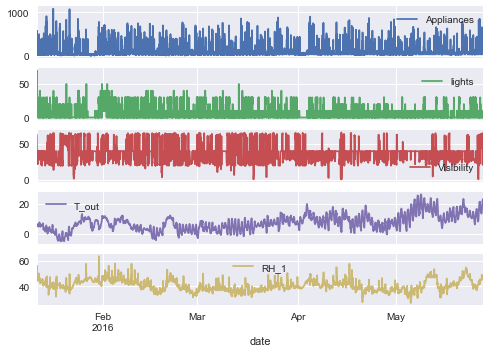

In [6]:
df.set_index('date')[['Appliances','lights','Visibility','T_out','RH_1']].plot(subplots=True)

In [7]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [8]:
df_input=df.iloc[:,1:29]
df_input

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [9]:
scaler = MinMaxScaler()
d_scaled = scaler.fit_transform(df_input)

In [10]:
d_scaled

array([[0.04672897, 0.42857143, 0.32734952, ..., 0.53846154, 0.26544891,
        0.26544891],
       [0.04672897, 0.42857143, 0.32734952, ..., 0.53393665, 0.37208289,
        0.37208289],
       [0.03738318, 0.42857143, 0.32734952, ..., 0.52941176, 0.57284766,
        0.57284766],
       ...,
       [0.24299065, 0.14285714, 0.91974657, ..., 0.89894419, 0.58397859,
        0.58397859],
       [0.38317757, 0.14285714, 0.91974657, ..., 0.8974359 , 0.12637146,
        0.12637146],
       [0.39252336, 0.14285714, 0.91974657, ..., 0.8959276 , 0.68239057,
        0.68239057]])

In [11]:
features=d_scaled
target= d_scaled[:,0]

In [12]:
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.116, random_state=42, shuffle = False)


In [13]:
trainX.shape

(17445, 28)

In [14]:
win_length=720
batch_size=32
n_features=28
train_generator = TimeseriesGenerator(trainX, trainY, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(testX, testY, length=win_length, sampling_rate=1, batch_size=batch_size)


In [15]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping
import mlflow
import mlflow.keras


In [16]:
    model = Sequential()
    model.add(LSTM(128, input_shape=(win_length, n_features), return_sequences=True))
    model.add(LeakyReLU(alpha=0.5)) 
    model.add(LSTM(128,  return_sequences=True))
    model.add(LeakyReLU(alpha=0.5)) 
    model.add(Dropout(0.3))
    model.add(LSTM(64,  return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(1))



In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 720, 128)          80384     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 720, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 720, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 720, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 720, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [17]:
callback = [EarlyStopping(monitor="loss", min_delta = 0.00001, patience = 50, mode = 'auto', restore_best_weights=True)] 
#monitor= val_koss, mode =min

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [18]:
    num_epoch = 3
    learning_rate = 0.0001
    history = model.fit_generator(train_generator, \
                                epochs=num_epoch, \
                                validation_data=test_generator, \
                                callbacks = callback, \
                                verbose=2, \
                                shuffle=False, \
                                initial_epoch=0)

Epoch 1/3


/Users/akaash/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


523/523 - 681s - loss: 0.0096 - mae: 0.0569 - val_loss: 0.0082 - val_mae: 0.0390
Epoch 2/3
523/523 - 692s - loss: 0.0085 - mae: 0.0530 - val_loss: 0.0076 - val_mae: 0.0378
Epoch 3/3
523/523 - 696s - loss: 0.0074 - mae: 0.0476 - val_loss: 0.0061 - val_mae: 0.0336


In [18]:
score = model.evaluate_generator(test_generator, verbose=0) 

/Users/akaash/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [22]:
from matplotlib import pyplot
import numpy as np

# Calculate the train loss and train metric, in this case mean absolute error
train_loss = np.mean(history.history['loss'])
train_mae = np.mean(history.history['mae'])

title = 'Train Loss: {0:.3f} Test Loss: {1:.3f}\n  Train MAE: {2:.3f}, Val MAE: {3:.3f}'.format(train_loss, score[0], train_mae, score[1])

# Plot loss function
fig = pyplot.figure()
pyplot.style.use('seaborn')

pyplot.plot(history.history['loss'], 'c-', label='train')
pyplot.plot(history.history['val_loss'], 'm:', label='test')
# pyplot.text(epoch-2, 0.07, rmse , style='italic')
pyplot.title(title)
pyplot.legend()
pyplot.grid(True)
fig.set_size_inches(w=7,h=7)
pyplot.close()
display(fig)



NameError: name 'history' is not defined

In [23]:
pred= model.predict(test_generator)

In [24]:
pred.shape

(1570, 1)

In [25]:
testY

array([0.06542056, 0.05607477, 0.06542056, ..., 0.24299065, 0.38317757,
       0.39252336])

In [26]:
testX

array([[0.06542056, 0.        , 0.90813094, ..., 0.88687783, 0.98588987,
        0.98588987],
       [0.05607477, 0.        , 0.90813094, ..., 0.8974359 , 0.79551466,
        0.79551466],
       [0.06542056, 0.        , 0.90461105, ..., 0.90799397, 0.80796734,
        0.80796734],
       ...,
       [0.24299065, 0.14285714, 0.91974657, ..., 0.89894419, 0.58397859,
        0.58397859],
       [0.38317757, 0.14285714, 0.91974657, ..., 0.8974359 , 0.12637146,
        0.12637146],
       [0.39252336, 0.14285714, 0.91974657, ..., 0.8959276 , 0.68239057,
        0.68239057]])

In [27]:
testX[:,1:][win_length:].shape


(1570, 27)

In [28]:
df_pred=pd.concat([pd.DataFrame(pred),pd.DataFrame(testX[:,1:][win_length:])], axis=1)

In [29]:
reverse= scaler.inverse_transform(df_pred)

In [30]:
df_final= df_input[pred.shape[0]*-1:]

In [31]:
df_final['app_pred']=reverse[:,0]

<ipython-input-31-51b0fc214057>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['app_pred']=reverse[:,0]


In [32]:
df_final

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,app_pred
18165,80,0,23.426667,38.126667,22.200000,36.580000,24.390000,35.700000,23.390000,34.900000,...,35.018000,13.200000,760.30,52.500000,2.000000,40.000000,3.550000,42.116837,42.116837,-10.899406
18166,80,0,23.463333,38.133333,22.128571,36.971429,24.390000,35.700000,23.323333,34.966667,...,35.064286,13.000000,760.30,54.333333,2.000000,40.000000,3.866667,46.930820,46.930820,-10.427301
18167,80,0,23.390000,37.933333,22.100000,37.236000,24.347143,35.751429,23.290000,35.000000,...,35.090000,12.800000,760.30,56.166667,2.000000,40.000000,4.183333,27.318882,27.318882,-9.832677
18168,80,0,23.390000,37.863333,22.014286,37.305714,24.330000,35.790000,23.290000,35.000000,...,35.012857,12.600000,760.30,58.000000,2.000000,40.000000,4.500000,2.090373,2.090373,-9.426541
18169,80,0,23.390000,37.790000,22.000000,37.460000,24.290000,35.821429,23.230000,35.000000,...,34.918000,12.466667,760.35,58.333333,1.833333,40.000000,4.466667,7.894714,7.894714,-9.893035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,46.790000,22.733333,755.20,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,-26.281933
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,46.790000,22.600000,755.20,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,-27.777284
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,46.790000,22.466667,755.20,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,-28.444423
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,46.817500,22.333333,755.20,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,-28.574839


In [33]:
y=model.predict(train_generator)
y.shape

(16725, 1)

In [ ]:
r=scaler.inverse_transform(y)

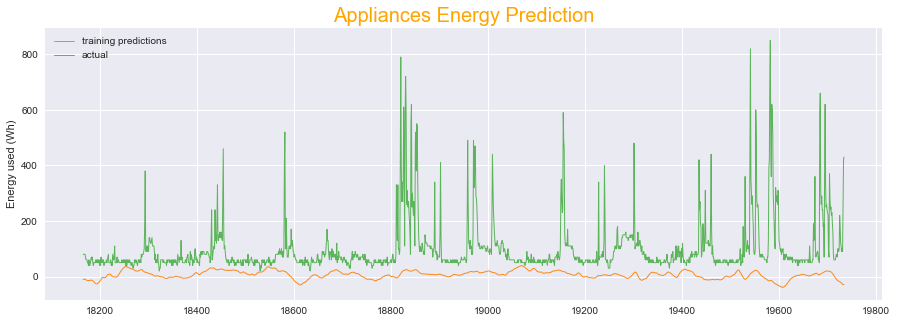

In [35]:
from matplotlib import pyplot

fig = pyplot.figure()
pyplot.style.use('seaborn')
palette = pyplot.get_cmap('Set1')
# pyplot.plot(y[:, n_lead-1], marker='', color=palette(4), linewidth=1, alpha=0.9, label='actual')
pyplot.plot(df_final['app_pred'], marker='', color=palette(4), linewidth=1, alpha=0.9, label='training predictions')
pyplot.plot(df_final['Appliances'], marker='', color=palette(2), linewidth=1, alpha=0.9, label='actual')


pyplot.title('Appliances Energy Prediction', loc='center', fontsize=20, fontweight=5, color='orange')
pyplot.ylabel('Energy used (Wh)')
pyplot.legend()
fig.set_size_inches(w=15,h=5)
pyplot.close()

display(fig)

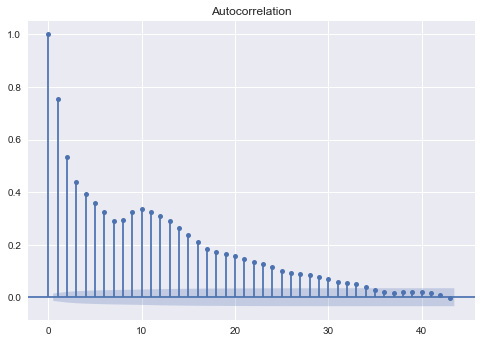

In [45]:

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Appliances'])
pyplot.show()


In [43]:
df['Appliances']


0         60
1         60
2         50
3         50
4         60
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: Appliances, Length: 19735, dtype: int64

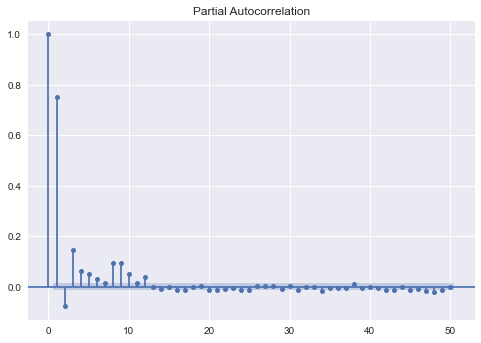

In [44]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Appliances'], lags=50)
pyplot.show()